## Analysis

1. Temperature generally drop with laptitude increase
2. Observed trend 2
3. Observed trend 3


TODO: Run 500, output chart, match PDF

In [173]:
import requests
import random
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from citipy import citipy
from config import WOM_API_KEY

sns.set()
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

N=2
BASE_URL = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + WOM_API_KEY + '&q='
TODAY = date.today().strftime('%m/%d/%y')

## Pick Random Cities by Geo Locations
Since some city cannot be found weather information, over sample with pick 2 * N samples.

In [174]:
# Use set to ensure uniuqeness of city
# Add country code to get better precision of weather information

cities_set = set()
while True:
    lat, lon = (random.random() * 90, random.random() * 180)
    city = citipy.nearest_city(lat, lon)
    cities_set.add((city.city_name, city.country_code, lat, lon))
    if len(cities_set) >= 2 * N: break     

df_cities = pd.DataFrame(
    list(cities_set),
    columns=['City Name', 'Country Code', 'Latitude', 'Longitude'])

## Check Randomness

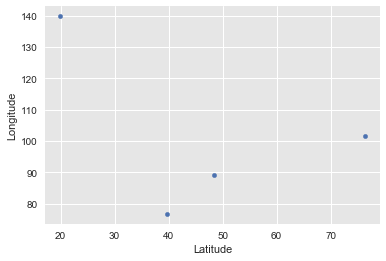

In [175]:
df_cities.plot.scatter('Latitude', 'Longitude')
plt.show()

From the scatter plot the distribution is pretty random.

## Scrap Weather Info
With 2 * N cities, query cities and if weather info not found, skip it, until reach N cities.

In [177]:
found = 0
for i in df_cities.index:
    city = '{},{}'.format(*df_cities.loc[i, ['City Name', 'Country Code']])
    url = BASE_URL + city
    print('Processing Record {} | {}\n{}'.format(i, city, url))
    
    response = requests.get(url)
    if response.status_code != 200:
        print('Weather not found for ' + city)
        continue

    w = response.json()   
    df_cities.loc[i, 'Humidity'] = w['main']['humidity']
    df_cities.loc[i, 'Temperature'] = w['main']['temp']
    df_cities.loc[i, 'Wind Speed'] = w['wind']['speed']
    df_cities.loc[i, 'Cloudiness'] = w['clouds']['all']
    
    found += 1
    if found == N:
        break
        
df_cities = df_cities[df_cities['Temperature'].notnull()]

Processing Record 0: naze,jp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=005c82cb8c035cbefecab652ccba00f1&q=naze,jp

Processing Record 1: altay,cn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=005c82cb8c035cbefecab652ccba00f1&q=altay,cn



## Recheck Randomness

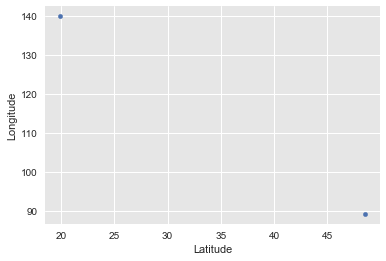

In [178]:
df_cities.plot.scatter('Latitude', 'Longitude')
plt.show()

### Plot Laptitude Vs Weather Metrics

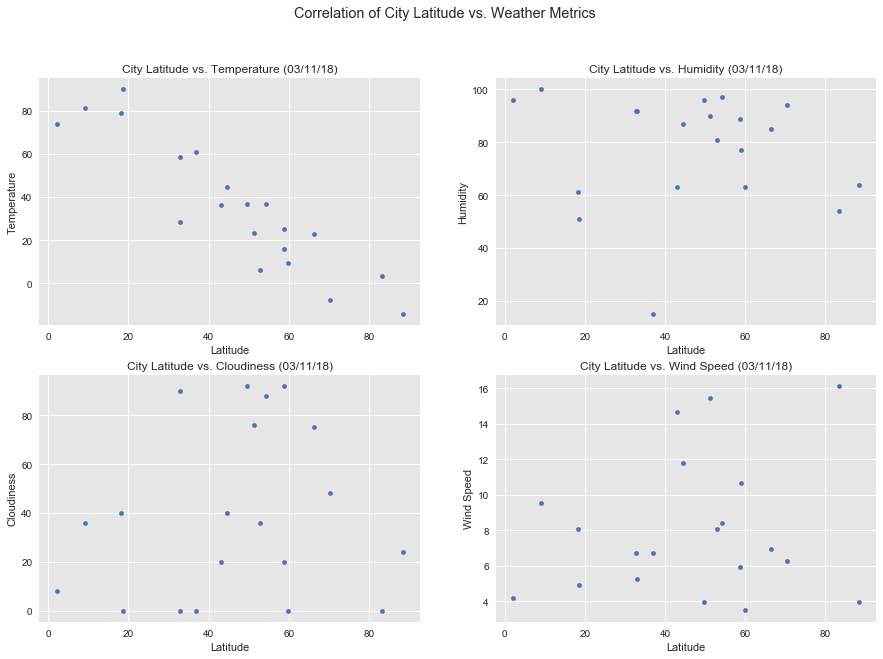

In [164]:
fig = plt.figure(figsize=(15,10))
fig.suptitle("Correlation of City Latitude vs. Weather Metrics")

for i, metric in [(1, 'Temperature'),
                  (2, 'Humidity'),
                  (3, 'Cloudiness'),
                  (4, 'Wind Speed')]:
    df_cities.plot.scatter(x='Latitude', y=metric, 
                           title='City Latitude vs. {} ({})'.format(metric, TODAY),
                           ax=plt.subplot(2, 2, i))                          
plt.show()